### Import Necessary Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

### Data loading and proprocessing

In [37]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [38]:
df.shape

(536350, 8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [40]:
dateFormat = '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [41]:
# Create New Columns : TotalMoney
df['TotalMoney'] = df['Price'] * df['Quantity']

# Create New Columns : Month
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create New Columns : Year
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019


In [42]:
# Check Null Value 
df.isnull().sum() 

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
TotalMoney        0
Month             0
Year              0
dtype: int64

# Exploratory Data Analysis

There are some CustomerNos missing so lets first check if CustomerNo is unique or just randomly assigned. If the customers are reused i.e. they use the same CustomerNos every month or in any interval it is not important.

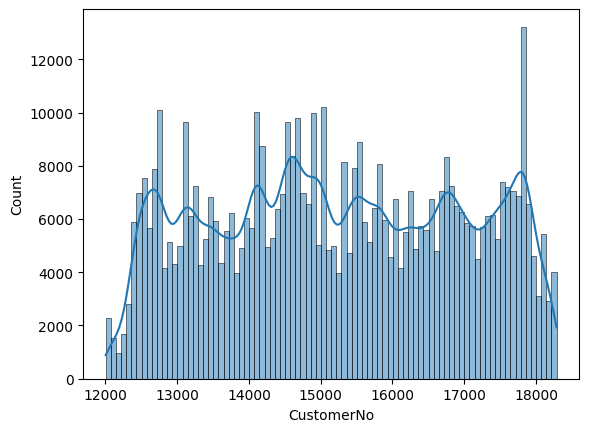

<Figure size 1200x800 with 0 Axes>

CustomerNo range: 12004.0 to 18287.0
Unique Customer Numbers: 4738
Missing customer numbers: [12000, 12001, 12002, 12003, 12005, 12007, 12009, 12010, 12011, 12012, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12027, 12028, 12029, 12030, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12044, 12045, 12046, 12047, 12048, 12049, 12051, 12052, 12053, 12054, 12055, 12056, 12058, 12059, 12061, 12062, 12064, 12065, 12066, 12068, 12069, 12070, 12072, 12073, 12074, 12075, 12076, 12077, 12079, 12083, 12084, 12085, 12086, 12088, 12091, 12092, 12094, 12095, 12096, 12097, 12098, 12099, 12101, 12102, 12103, 12104, 12105, 12106, 12107, 12108, 12109, 12110, 12111, 12112, 12113, 12114, 12117, 12118, 12119, 12121, 12122, 12123, 12124, 12125, 12126, 12127, 12129, 12131, 12132, 12133, 12135, 12136, 12137, 12138, 12139, 12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149, 12150, 12152, 12153, 12155, 12156, 12157, 12158, 12159, 12162, 12163, 121

In [43]:
sns.histplot(df['CustomerNo'], kde=True)
plt.figure(figsize=(12,8))
plt.show()

min_customer = df['CustomerNo'].min()
max_customer = df['CustomerNo'].max()
print(f"CustomerNo range: {min_customer} to {max_customer}")

unique_customers = df['CustomerNo'].nunique()
print(f"Unique Customer Numbers: {unique_customers}")

all_customers = set(range(12000, 18001))  # inclusive
actual_customers = set(df['CustomerNo'].unique())

missing_customers = all_customers - actual_customers
print(f"Missing customer numbers: {sorted(missing_customers)}")
print(f"Count of missing numbers: {len(missing_customers)}")

In [44]:
country_counts = df.groupby('CustomerNo')['Country'].nunique()
suspicious_customers = country_counts[country_counts > 1]
if len(suspicious_customers) == 0:
    print("Each CustomerNo is associated with only one Country.")
else:
    print("Some CustomerNo values are associated with multiple Countries.")
    print(suspicious_customers)

Each CustomerNo is associated with only one Country.


In [45]:
missing_cust_rows = df[df['CustomerNo'].isna()]
transactions_with_missing = missing_cust_rows['TransactionNo'].unique()
print(f"{len(transactions_with_missing)} transaction(s) with missing CustomerNo")

multi_customer_transactions = []
for txn in transactions_with_missing:
    txn_rows = df[df['TransactionNo'] == txn]
    if txn_rows['CustomerNo'].notna().any():
        multi_customer_transactions.append(txn)

if len(transactions_with_missing) == 1:
    print("Missing CustomerNo occurs only in a single transaction.")
elif len(multi_customer_transactions) == 0:
    print("No transaction with missing CustomerNo also has a valid CustomerNo — they are entirely missing.")
else:
    print("Some transactions with missing CustomerNo also have valid CustomerNo in other rows:")
    print(multi_customer_transactions)

36 transaction(s) with missing CustomerNo
No transaction with missing CustomerNo also has a valid CustomerNo — they are entirely missing.


In [46]:
unique_countries = missing_cust_rows['Country'].dropna().unique()

if len(unique_countries) == 1:
    print(f"All missing CustomerNo transactions are from the same country: {unique_countries[0]}")
else:
    print(f"Missing CustomerNo transactions are from multiple countries: {unique_countries}")

All missing CustomerNo transactions are from the same country: United Kingdom


In [47]:
new_customer_ids = range(11500, 11636)
txn_to_customer = dict(zip(transactions_with_missing, new_customer_ids))

def fill_customer(row):
    if pd.isna(row['CustomerNo']) and row['TransactionNo'] in txn_to_customer:
        return txn_to_customer[row['TransactionNo']]
    else:
        return row['CustomerNo']

df['CustomerNo'] = df.apply(fill_customer, axis=1)

In [48]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
TotalMoney       0
Month            0
Year             0
dtype: int64

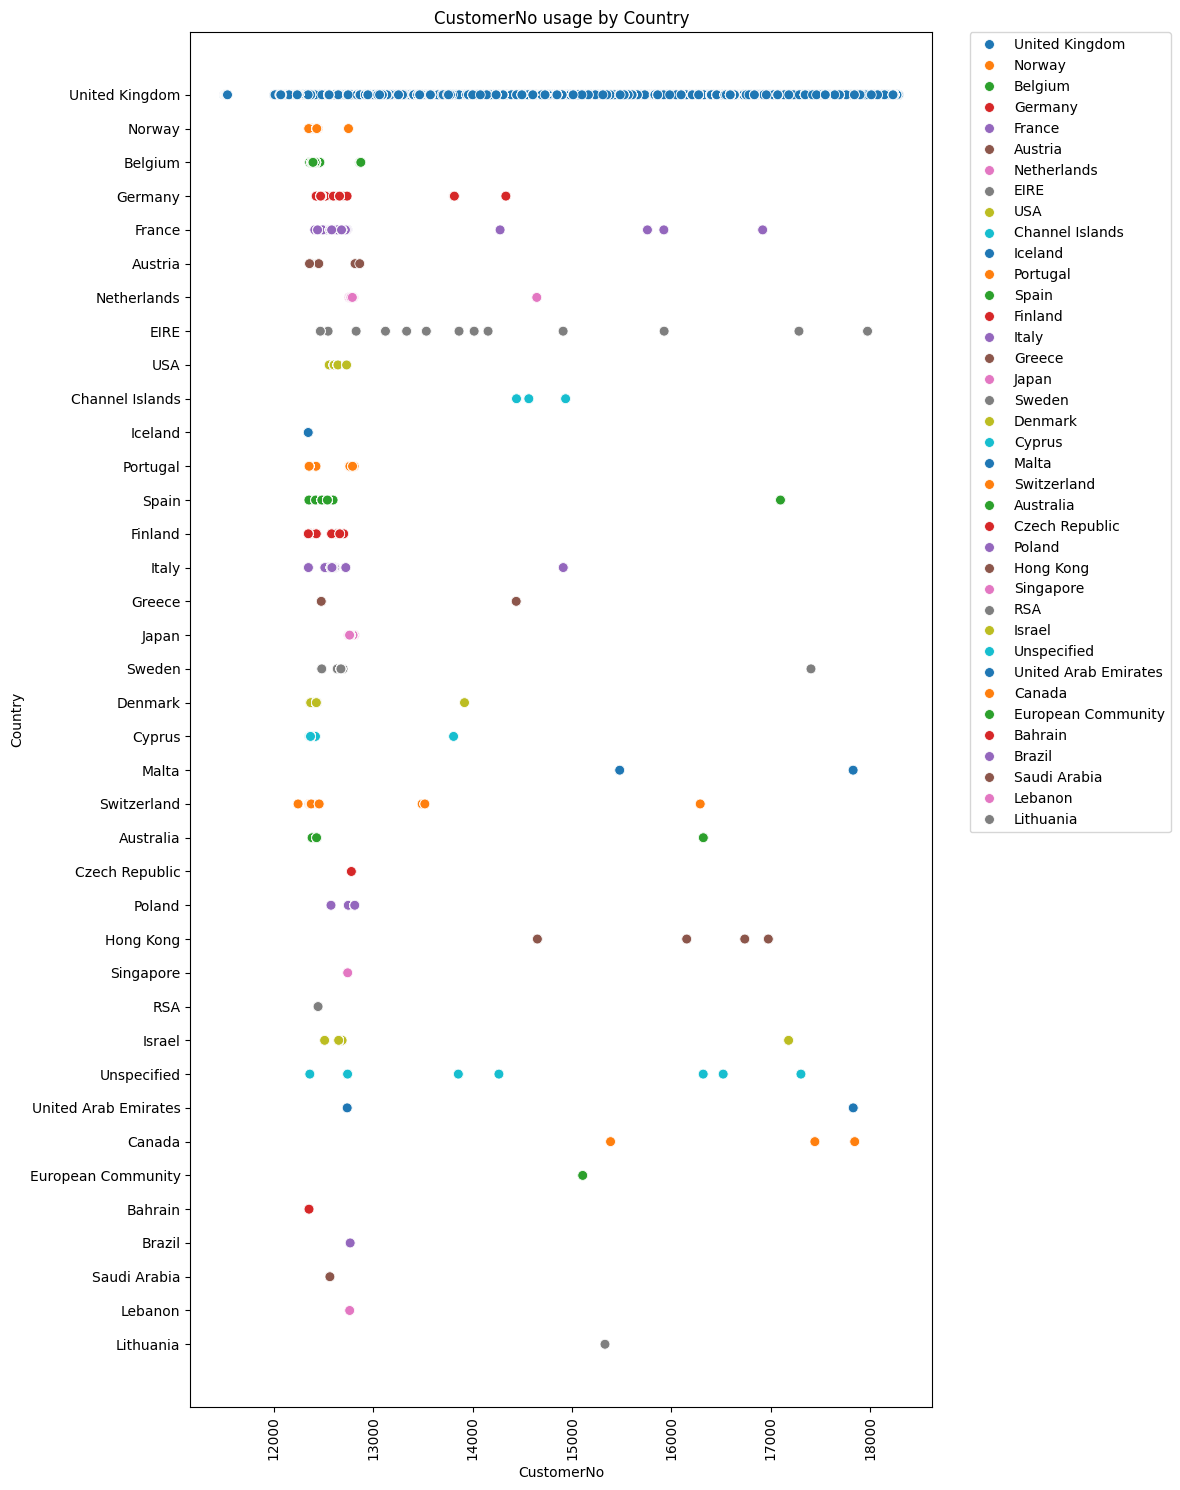

In [49]:
plt.figure(figsize=(12, 15))
sns.scatterplot(data=df, x='CustomerNo', y='Country', hue='Country', palette='tab10', s=50)

plt.title("CustomerNo usage by Country")
plt.xlabel("CustomerNo")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

In [ ]:
transactionCount = df['TransactionNo'].value_counts()
print(len(transactionCount))

# What are the most popular and money generating products? 

##### 10 Products that Give Highest Total Money

In [ ]:
# Variable to store data
listTransaction = df['TransactionNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listTransaction:
    totalMoney = df['TotalMoney'].loc[df['TransactionNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictTransaction = {
    'TransactionNo' : listTransaction,
    'TotalMoney' : listTotalMoney
}

# Adjust DataFrame
dfTransaction = pd.DataFrame(dictTransaction)
dfTransaction = dfTransaction.sort_values('TotalMoney',ascending=False).head(10)
dfTransaction = dfTransaction.reset_index(drop=True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfTransaction, x = 'TransactionNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Transactions that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.show()

##### 10 Products that Give Highest Total Money

In [ ]:
# Variable to Store Data
listProduct = df['ProductNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listProduct:
    totalMoney = df['TotalMoney'].loc[df['ProductNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictProduct = {
    'ProductNo' : listProduct,
    'TotalMoney' : listTotalMoney
}

# Adjust DataFrame
dfProduct = pd.DataFrame(dictProduct)
dfProduct = dfProduct.sort_values('TotalMoney',ascending=False).head(10)
dfProduct = dfProduct.reset_index(drop=True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfProduct, x = 'ProductNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()

# Show Product Number, Product Name and Total Money
listProductName = []
for i in dfProduct['ProductNo']:
    a = df['ProductName'].loc[df['ProductNo'] == i].unique()[0]
    listProductName.append(a) 
dfProduct['ProductName'] = listProductName
print(dfProduct)

##### 10 Products Price that Give Highest TOtal Money

In [ ]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    pricePiece = round(df['Price'].loc[df['ProductNo']==listProductNo[i]].mean(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,pricePiece*1.05,pricePiece,ha='center')
    plt.bar(x = labelx, height = pricePiece)

plt.ylim(0,33)
plt.title('10 Products Price that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

##### 10 Products Total Quantity that Give Highest Total Money

In [ ]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    totalQuantity = round(df['Quantity'].loc[df['ProductNo']==listProductNo[i]].sum(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,totalQuantity*1.03,totalQuantity,ha='center')
    plt.bar(x = labelx, height = totalQuantity)

plt.ylim(0,65000)
plt.title('10 Products Total Quantity that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

##### 10 Countries that GIve Total Highest Money

In [ ]:
# Variable to Store
listCountry = df['Country'].unique()
listTotalMoney = []

# Loop to Store Data
for i in listCountry:
    totalMoney = round(df['TotalMoney'].loc[df['Country'] == i].sum(), 2)
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictCountry = {
    'CountryName': listCountry,
    'TotalMoney': listTotalMoney
}

# Adjust DataFrame
dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('TotalMoney', ascending=False).reset_index(drop=True)

# Keep top 6 countries, group the rest into "Others"
top6 = dfCountry.head(7)
others = pd.DataFrame({
    'CountryName': ['Others'],
    'TotalMoney': [dfCountry['TotalMoney'][7:].sum()]
})
dfCountryFinal = pd.concat([top6, others])

# Create Pie Chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Different colors for each slice

# Plot the pie chart with adjusted label positions
wedges, texts, autotexts = plt.pie(
    dfCountryFinal['TotalMoney'],
    labels=dfCountryFinal['CountryName'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10},
    pctdistance=0.75,  # Move percentage labels closer to center (0.5 = halfway)
    labeldistance=1.1,  # Adjust country label distance from center
)

# Tilt percentage labels toward center (adjust rotation)
for autotext in autotexts:
    autotext.set_rotation_mode('anchor')  # Smooth rotation
    autotext.set_ha('center')  # Horizontal alignment
    autotext.set_va('center')  # Vertical alignment

plt.title('Top 6 Countries by Revenue Contribution (%)', pad=20, fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Show the breakdown (optional)
print("Top 6 Countries + Others:")
print(dfCountryFinal)

##### Total Money Every Months in 2019

In [ ]:
# Variable to Store
listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalMoney'].loc[(df['Month']==i)&(df['Year']==2019)].sum(),2)
    listTotalMoney.append(totalMoney)
    
# Dictionary for DataFrame
dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]


# Create Figure
plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months in 2019')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

##### Country that Gives Highest Total Money from Each Month

In [ ]:
def searchTotalMoney(country,month):
    return round(df['TotalMoney'].loc[(df['Country'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth


##### Total Money each Month that is Received from Top 10 Products that Give Highest Total MOney in 2019

In [ ]:
topTenCountry = dfCountry['CountryName'].unique().copy()
listMonthTopTen = listMonth.reverse()
listMonthTopTen = listMonth

plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

##### Total Quantity each Month from Top 10 Products that Give Highest Total MOney in 2019

In [ ]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['Quantity'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

### Revenue Prediction
**Goal**: Predict future revenue based on historical data.